Dataset shape: (205, 26)
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horse

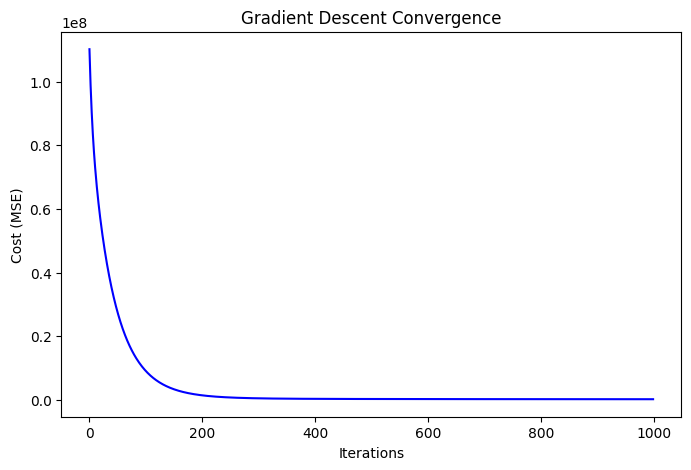

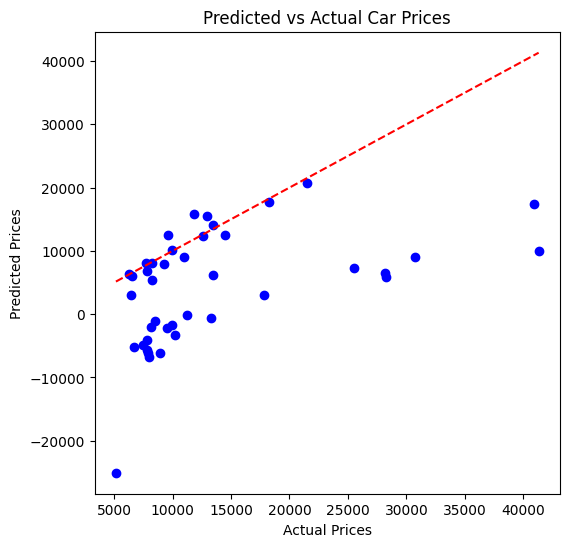

How does learning rate affect convergence?
- Too small → convergence is very slow.
- Too large → may diverge or oscillate.
Final MSE: 165942475.89, R²: -1.1020


In [2]:
# ===========================================
# Gradient Descent: Predicting Car Prices
# ===========================================

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 2. Load dataset
data = pd.read_csv("car_price.csv")
print("Dataset shape:", data.shape)
print(data.head())

# 3. Preprocessing
# Target variable: price
y = data["price"].values
X = data.drop("price", axis=1)

# Handle categorical variables (if any)
X = pd.get_dummies(X, drop_first=True)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 4. Define cost function (MSE)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# 5. Gradient Descent Implementation
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta = theta - learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")
            
    return theta, cost_history

# Add intercept term (bias)
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Initialize theta (weights)
theta_init = np.zeros(X_train_b.shape[1])

# Run gradient descent
learning_rate = 0.01
iterations = 1000
theta_final, cost_history = gradient_descent(
    X_train_b, y_train, theta_init, learning_rate, iterations
)

print("Final parameters:", theta_final)

# 6. Evaluate the model
y_pred = X_test_b.dot(theta_final)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# 7. Visualizations
# Cost function convergence
plt.figure(figsize=(8,5))
plt.plot(range(len(cost_history)), cost_history, 'b-')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.show()

# Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Car Prices")
plt.show()

# 8. Insights
print("How does learning rate affect convergence?")
print("- Too small → convergence is very slow.")
print("- Too large → may diverge or oscillate.")
print(f"Final MSE: {mse:.2f}, R²: {r2:.4f}")
